In [15]:
# pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import dataframe_image as dfi

In [23]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# view tables in DB
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
#june_temps

In [27]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
# june_temps_list

In [28]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
# june_temp_df

In [33]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_summary_stats = june_temp_df.describe()

# export as image
dfi.export(june_temp_summary_stats, ("Images/june_temp_summary_stats.png"))

In [31]:
june_temp_summary_stats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [35]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
# december_temps

In [37]:
# 7. Convert the December temperatures to a list.
december_temps_list = [temp.tobs for temp in december_temps]
# december_temps_list

In [38]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temps_list, columns=['December Temps'])
december_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [39]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_summary_stats = december_temp_df.describe()

# export as image
dfi.export(december_temp_summary_stats, ("Images/december_temp_summary_stats.png"))

In [43]:
from matplotlib import pyplot as plt

In [44]:
june_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


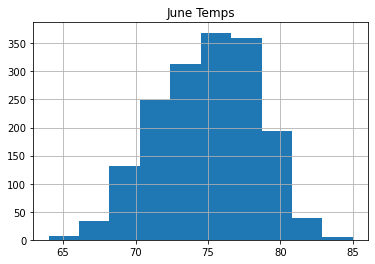

In [46]:
# plot a histogram
june_temp_df.hist()

# save image
plt.savefig("Images/june_temps_hist.png")